# Technical Indicator Tutorial

TA-Lib library tutorials

https://pypi.org/project/talib-binary/

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

In [6]:
import talib
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

In [7]:
DATA_HOME = os.path.join("..","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)
daily = df['2014-01-01':'2016-12-31']


In [8]:
daily

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,198.5,187.0,198.0,187.0,12694200.0,137.609299
2014-01-03,196.0,186.5,187.0,196.0,16987100.0,144.232224
2014-01-06,203.0,191.0,195.0,201.0,10294700.0,147.911621
2014-01-07,210.0,200.0,205.0,210.0,11479200.0,154.534515
2014-01-08,210.0,203.0,208.0,206.0,13653100.0,151.591019
...,...,...,...,...,...,...
2016-12-26,145.5,144.5,145.0,145.0,2073000.0,126.894188
2016-12-27,145.5,144.0,145.5,144.0,2083000.0,126.019043
2016-12-28,145.0,144.0,144.5,144.5,2412300.0,126.456635


In [17]:
from talib.abstract import *

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}


daily_sma = SMA(inputs, timeperiod=25)

daily["SMA"] = daily_sma.tolist()
daily

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,High,Low,Open,Close,Volume,Adj Close,SMA
Date,,,,,,,
2014-01-02,198.5,187.0,198.0,187.0,12694200.0,137.609299,NaN
2014-01-03,196.0,186.5,187.0,196.0,16987100.0,144.232224,NaN
2014-01-06,203.0,191.0,195.0,201.0,10294700.0,147.911621,NaN
2014-01-07,210.0,200.0,205.0,210.0,11479200.0,154.534515,NaN
2014-01-08,210.0,203.0,208.0,206.0,13653100.0,151.591019,NaN
...,...,...,...,...,...,...,...
2016-12-26,145.5,144.5,145.0,145.0,2073000.0,126.894188,144.90
2016-12-27,145.5,144.0,145.5,144.0,2083000.0,126.019043,144.92
2016-12-28,145.0,144.0,144.5,144.5,2412300.0,126.456635,144.96


In [19]:
obv = OBV(inputs)
obv

array([ 1.269420e+07,  2.968130e+07,  3.997600e+07,  5.145520e+07,
        3.780210e+07,  2.649470e+07,  1.035320e+07,  2.171500e+07,
        3.093850e+07,  2.067820e+07,  3.119570e+07,  2.413320e+07,
        1.711190e+07,  2.249820e+07,  2.249820e+07,  2.996420e+07,
        2.996420e+07,  2.325550e+07,  1.472480e+07,  1.914730e+07,
        1.275740e+07,  1.627330e+07,  2.477730e+07,  1.769000e+07,
        1.769000e+07,  2.182890e+07,  1.665010e+07,  1.665010e+07,
        6.313500e+06,  1.351750e+07,  1.819220e+07,  2.658760e+07,
        2.029810e+07,  1.130730e+07, -2.776000e+05, -6.579200e+06,
       -1.871910e+07, -1.398840e+07, -1.398840e+07, -9.201400e+06,
       -9.201400e+06, -2.916500e+06, -2.916500e+06, -2.916500e+06,
       -2.916500e+06, -6.899200e+06, -6.899200e+06, -6.899200e+06,
       -1.620230e+07, -7.305600e+06, -1.268420e+07, -6.774600e+06,
       -1.177620e+07, -4.280800e+06,  4.829600e+06,  1.037640e+07,
        1.037640e+07,  5.517800e+06,  1.002070e+07,  1.440200e

In [21]:
ad = AD(inputs)
ad

array([-1.26942000e+07,  4.29290000e+06,  1.11560333e+07,  2.26352333e+07,
        2.06847905e+07,  1.31465238e+07,  1.31465238e+07,  2.27603546e+07,
        2.93485689e+07,  2.11403289e+07,  3.16578289e+07,  3.67024717e+07,
        3.31918217e+07,  3.04986717e+07,  3.40549917e+07,  3.65436584e+07,
        3.20776870e+07,  2.53689870e+07,  2.36628470e+07,  2.36628470e+07,
        2.15328803e+07,  2.50487803e+07,  3.11230660e+07,  2.87606327e+07,
        2.87606327e+07,  3.28995327e+07,  2.77207327e+07,  2.77207327e+07,
        2.56534127e+07,  2.99758127e+07,  3.15340460e+07,  3.99294460e+07,
        3.99294460e+07,  3.63331260e+07,  3.40161460e+07,  3.40161460e+07,
        3.92189603e+07,  3.63805403e+07,  3.29003403e+07,  3.60916736e+07,
        3.70466936e+07,  3.91416603e+07,  3.69504103e+07,  3.57725703e+07,
        3.57725703e+07,  3.33829503e+07,  3.57428503e+07,  2.96026503e+07,
        2.65016170e+07,  3.28564027e+07,  3.55457027e+07,  4.14553027e+07,
        3.64537027e+07,  

In [28]:
atr = ATR(inputs)
daily["ATR"] = atr.tolist()
daily["RSI"] = RSI(inputs).tolist()
daily["AD"] = AD(inputs).tolist()
daily

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,High,Low,Open,Close,Volume,Adj Close,SMA,ATR,RSI,AD
Date,,,,,,,,,,
2014-01-02,198.5,187.0,198.0,187.0,12694200.0,137.609299,NaN,NaN,NaN,-1.269420e+07
2014-01-03,196.0,186.5,187.0,196.0,16987100.0,144.232224,NaN,NaN,NaN,4.292900e+06
2014-01-06,203.0,191.0,195.0,201.0,10294700.0,147.911621,NaN,NaN,NaN,1.115603e+07
2014-01-07,210.0,200.0,205.0,210.0,11479200.0,154.534515,NaN,NaN,NaN,2.263523e+07
2014-01-08,210.0,203.0,208.0,206.0,13653100.0,151.591019,NaN,NaN,NaN,2.068479e+07
...,...,...,...,...,...,...,...,...,...,...
2016-12-26,145.5,144.5,145.0,145.0,2073000.0,126.894188,144.90,1.893209,43.464502,-5.490516e+08
2016-12-27,145.5,144.0,145.5,144.0,2083000.0,126.019043,144.92,1.865123,39.681142,-5.511346e+08
2016-12-28,145.0,144.0,144.5,144.5,2412300.0,126.456635,144.96,1.803328,42.381727,-5.511346e+08


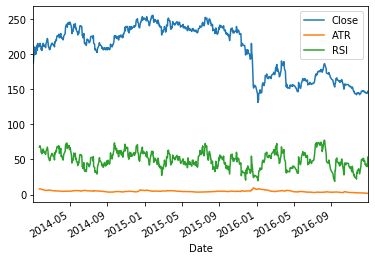

In [31]:
daily[["Close","ATR", "RSI"]].plot()